In [58]:
models = ['clip', 'albef', 'vilt']

In [59]:
from pathlib import Path
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist, squareform, pdist
from scipy.stats import ttest_rel, spearmanr
import seaborn as sns
import torch

from fsk.config import layers, feature_types, multi_models_info
from fsk.dataprep.utils import get_synsets_ids, get_fsk, get_fsk_features, get_feature_idx_map
from fsk.it_match.load import get_match, get_concept_match_distance
from fsk.similarity.sem_distances import get_mcrae_features

from IPython.display import Image

In [60]:
# Load paths
project_path = Path('/Users/m_vilas/projects/fsk-multimodal')
res_path = project_path / 'results/'
rsa_path = res_path / 'rsa'
image_path = project_path / 'dataset/things/object_images'

In [61]:
# Load synsets and concepts
synsets_imgs, concepts = get_synsets_ids(project_path / 'dataset')
concepts_things = concepts['things']
synsets = list(synsets_imgs.keys())
synset_concept_map = {s: c for s, c in zip(synsets, concepts_things)}
# Load semantic feature data
fsk_info = get_fsk(project_path / 'dataset')
sem_ft = get_fsk_features(project_path / 'dataset')
sem_ft_idx = get_feature_idx_map(project_path / 'dataset/annotations')
r_sem_ft_idx = {val: key for key, val in sem_ft_idx.items()}
sem_ft_type = {f: f_t for f, f_t in zip(fsk_info['features'], fsk_info['features_type'])}

In [49]:
# Load predictions
# c_match, c_labels = get_match(res_path, m, synsets_imgs, center=True, avg=False)
# c_match_avg = get_match(res_path, m, synsets_imgs, center=True, avg=True)
# sem_match =  get_match(res_path, m, synsets_imgs, m_type='feature', center=True)
# sem_match_avg = get_match(res_path, m, synsets_imgs, m_type='feature', center=True, avg=True)

In [10]:
m = 'clip'
c_dist, c_labels = get_concept_match_distance(res_path, m, synsets_imgs, img_to_txt=False)

In [15]:
test = pd.DataFrame(c_dist, index=pd.MultiIndex.from_tuples(c_labels))
test.sort_values(by=0, ascending=False)[:20]

0
cucumber-n-02 zucchini-n-02       5.772318
clarinet-n-01 flute-n-01          5.400513
cello-n-01    violin-n-01         5.216909
ladle-n-01    spoon-n-01          4.850009
              pan-n-01            4.846871
oven-n-01     stove-n-01          4.835296
belt-n-02     buckle-n-01         4.780320
mouse-n-01    mouse-n-04          4.772920
beet-n-02     radish-n-01         4.707969
ax-n-01       hatchet-n-02        4.689639
broom-n-01    brush-n-02          4.685409
scooter-n-02  tricycle-n-01       4.673586
pliers-n-01   scissors-n-01       4.658217
cushion-n-03  pillow-n-01         4.654144
chair-n-01    rocking_chair-n-01  4.651846
sandal-n-01   slipper-n-01        4.627477
cheetah-n-01  leopard-n-02        4.612305
cup-n-01      mug-n-04            4.606131
ladle-n-01    spatula-n-01        4.605408
fork-n-01     spatula-n-01        4.574144

In [16]:
c_dist_2, c_labels_2 = get_concept_match_distance(res_path, m, synsets_imgs)
test_2 = pd.DataFrame(c_dist_2, index=pd.MultiIndex.from_tuples(c_labels_2))
test_2.sort_values(by=0, ascending=False)[:20]

,,0
cucumber-n-02,zucchini-n-02,5.875939
ax-n-01,hatchet-n-02,5.483907
clarinet-n-01,flute-n-01,5.135989
cello-n-01,violin-n-01,4.928893
orange-n-01,wall-n-01,4.908860
calf-n-01,cow-n-01,4.868802
crowbar-n-01,tongs-n-01,4.795832
cart-n-01,wagon-n-01,4.791847
bull-n-01,cow-n-01,4.775908
chipmunk-n-01,squirrel-n-01,4.750008


In [18]:
print(spearmanr(c_dist, c_dist_2, nan_policy='omit'))

SpearmanrResult(correlation=0.31659912923202, pvalue=0.0)


## Are V+L models representations different from their unimodal counterparts?

- Do this multi-modal models have different conceptual sperability and spaces than their unimodal counterparts?

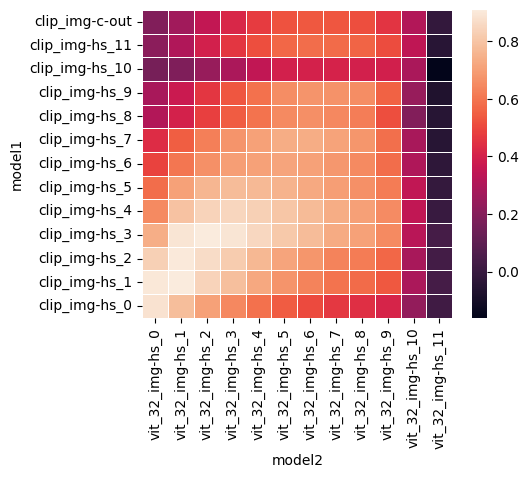

In [191]:
file = rsa_path / 'clip_img_vit_32.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'vit_32_img-hs_{n}' for n in range(12)]
rows = [f'clip_img-hs_{n}' for n in range(12)] + ['clip_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.6, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

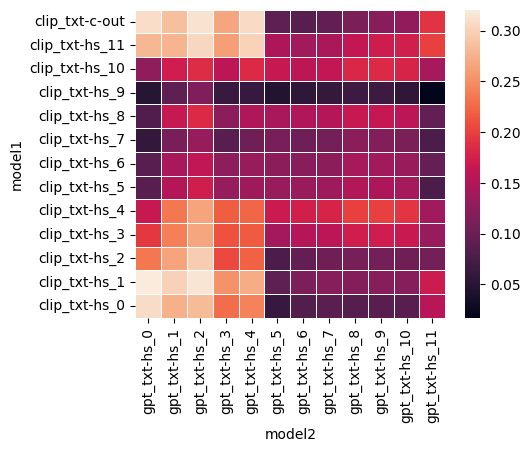

In [192]:
file = rsa_path / 'clip_txt_gpt.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'gpt_txt-hs_{n}' for n in range(12)]
rows = [f'clip_txt-hs_{n}' for n in range(12)] + ['clip_txt-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.5, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

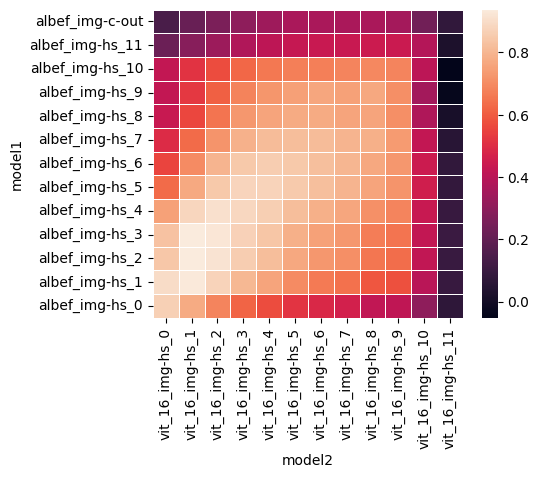

In [193]:
file = rsa_path / 'albef_img_vit_16.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'vit_16_img-hs_{n}' for n in range(12)]
rows = [f'albef_img-hs_{n}' for n in range(12)] + ['albef_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

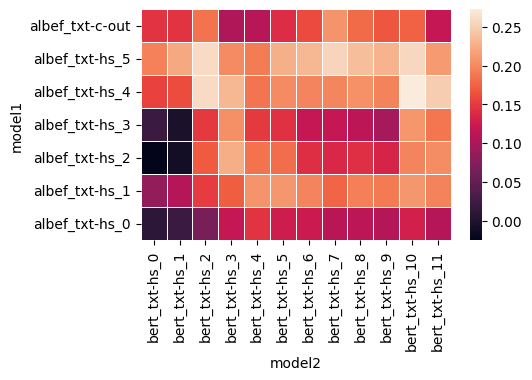

In [196]:
file = rsa_path / 'albef_txt_bert.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'bert_txt-hs_{n}' for n in range(12)]
rows = [f'albef_txt-hs_{n}' for n in range(6)] + ['albef_txt-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

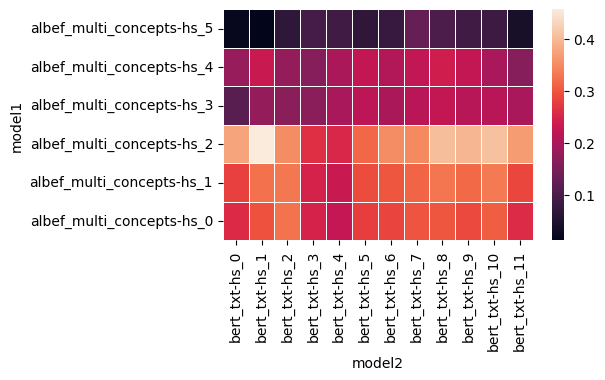

In [197]:
file = rsa_path / 'albef_multi_bert.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'bert_txt-hs_{n}' for n in range(12)]
rows = [f'albef_multi_concepts-hs_{n}' for n in range(6)]
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

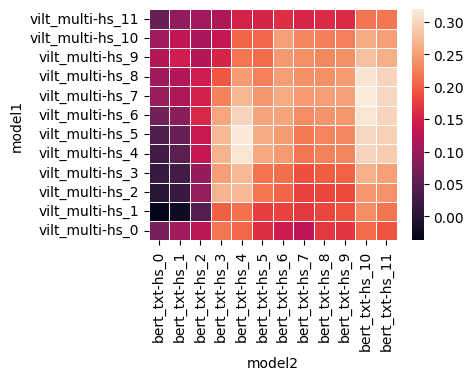

In [201]:
file = rsa_path / 'vilt_multi_bert.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'bert_txt-hs_{n}' for n in range(12)]
rows = [f'vilt_multi-hs_{n}' for n in range(12)]
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

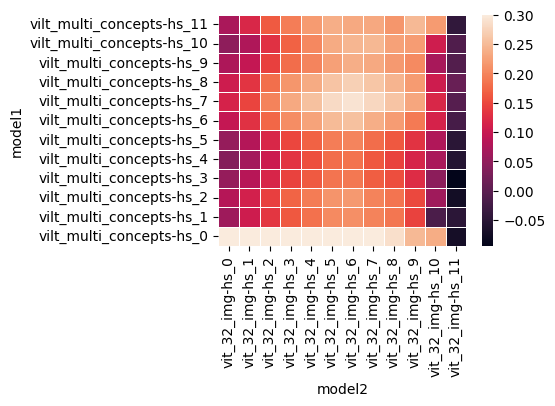

In [202]:
file = rsa_path / 'vilt_multi_vit_32.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'vit_32_img-hs_{n}' for n in range(12)]
rows = [f'vilt_multi_concepts-hs_{n}' for n in range(12)]
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(
    dist, linewidth=.5, 
    vmax=.3, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

__Observations__:
- Vision streams conserve invariances more than text streams
- ViLT combines both types of images 

## Can V + L models detect concepts in images?

### High but varying concept prediction accuracy

In [50]:
top_k = [1, 5, 10]

c_preds = {}
for m in models:
    c_match, c_labels = get_match(res_path, m, synsets_imgs, center=True, avg=False, return_np=False)
    m_preds = []
    c_match_path = res_path / m / 'concept_match'
    i = 0
    for s, s_imgs in synsets_imgs.items():
        correct_val = synsets.index(s)
        for img in s_imgs:
            val = [s, img]
            i_pred = c_match[i]
            i = i + 1
            top_indices = i_pred.topk(15)[1]
            val.append([synsets[i] for i in top_indices])
            for t in top_k:
                val.append(correct_val in top_indices[:t])
            m_preds.append(val)
    c_preds[m] = pd.DataFrame(m_preds, columns=['synset', 'image', 'preds', 'top1', 'top5', 'top10'])
    print(m)
    print(f"Top1 accuracy: {c_preds[m]['top1'].mean()}")
    print(f"Top5 accuracy: {c_preds[m]['top5'].mean()}")
    print(f"Top10 accuracy: {c_preds[m]['top10'].mean()}")
    print("\n")

clip
Top1 accuracy: 0.8301542207792207
Top5 accuracy: 0.9659090909090909
Top10 accuracy: 0.9831574675324676


albef
Top1 accuracy: 0.8110795454545454
Top5 accuracy: 0.948051948051948
Top10 accuracy: 0.9638798701298701


vilt
Top1 accuracy: 0.5186688311688312
Top5 accuracy: 0.7719155844155844
Top10 accuracy: 0.8398944805194806




In [51]:
c_preds = (
    pd.concat(c_preds)
    .reset_index(level=1, drop=True)
    .reset_index()
    .rename(columns={'index':'model'})
)

In [ ]:
# top_k = [1, 5, 10]

# s_lens = [len(s_imgs) for s, s_imgs in synsets_imgs.items()]
# correct_preds = np.repeat(np.arange(len(synsets)), s_lens, axis=0)

# c_preds = {}
# for m in models:
#     print(m)
#     c_match, c_labels = get_match(res_path, m, synsets_imgs, center=True, avg=False, return_np=False)
#     top_preds = c_match.topk(15)[1].detach().numpy()
#     acc = {}
#     for k in top_k:
#         acc[k] = [np.sum(np.isin(top_preds[i, :k], correct_preds[i])) for i in range(len(top_preds))]
#         print(f"Top{k} accuracy: {np.sum(acc[k]) / len(top_preds)}")
#     #preds = [synsets[i] for i in top_preds]
#     c_preds[m] = pd.DataFrame({'top1': acc[1], 'top5': acc[5], 'top10': acc[10]})
#     print("\n")

### Concept prediction characterization

- Correlate concept detection accuracies with psycholinguistic properties outlined here: https://www.sc.edu/study/colleges_schools/artsandsciences/psychology/research_clinical_facilities/scope/search.php

In [42]:
corrs = {}
for m in models:
    # Get average prediction values 
    counts = [concepts_things.count(c) for c in concepts_things]
    unique_idxs = [idx for idx, c in enumerate(counts) if c == 1]
    unique_concepts = [concepts_things[i] for i in unique_idxs]
    c_preds_avg = c_preds.loc[c_preds['model']==m].groupby('synset').mean()
    c_preds_avg = c_preds_avg.iloc[unique_idxs]
    c_preds_avg['concept'] = [synset_concept_map[s] for s in c_preds_avg.index]
    c_preds_avg = c_preds_avg.reset_index().set_index('concept')

    # Load PL data
    pl_data = pd.read_csv(
        project_path / 'dataset/annotations/psycholinguistic_info.csv', sep=';'
    ).set_index('Word')
    common_concepts = sorted(list(set(c_preds_avg.index.tolist()).intersection(pl_data.index.tolist())))
    pl_data = pl_data.reindex(common_concepts)

    # Get predictor values
    predictor = []
    for c in pl_data.index:
        predictor.append(c_preds_avg.loc[c]['top1'])

    # Compute correlation
    res = []
    for column in pl_data.columns:
        corr, pval = spearmanr(predictor, pl_data[column], nan_policy='omit')
        res.append([column, corr, np.round(pval,3)])
    corrs[m] = pd.DataFrame(res, columns=['PL type', 'corr', 'pval'])
corrs = pd.concat(corrs)

In [43]:
corrs.sort_values(by='corr', ascending=False)
for pl_t in corrs['PL type'].unique():
    display(corrs.loc[corrs['PL type'] == pl_t])

,,PL type,corr,pval
clip,0,Freq_Blog,-0.063761,0.247
albef,0,Freq_Blog,-0.005047,0.927
vilt,0,Freq_Blog,0.342214,0.000


,,PL type,corr,pval
clip,1,Freq_News,-0.036384,0.509
albef,1,Freq_News,0.005103,0.926
vilt,1,Freq_News,0.296904,0.000


,,PL type,corr,pval
clip,2,CD_Blog,-0.070294,0.202
albef,2,CD_Blog,-0.012675,0.818
vilt,2,CD_Blog,0.333899,0.000


,,PL type,corr,pval
clip,3,CD_News,-0.041398,0.453
albef,3,CD_News,0.001167,0.983
vilt,3,CD_News,0.294557,0.000


,,PL type,corr,pval
clip,4,Prevalence_Brys,-0.007800,0.888
albef,4,Prevalence_Brys,-0.030606,0.579
vilt,4,Prevalence_Brys,0.181318,0.001


,,PL type,corr,pval
clip,5,Nsenses_WordNet,-0.213725,0.000
albef,5,Nsenses_WordNet,-0.095761,0.082
vilt,5,Nsenses_WordNet,0.029957,0.588


,,PL type,corr,pval
clip,6,Visual_Lanc,0.135064,0.014
albef,6,Visual_Lanc,0.069682,0.207
vilt,6,Visual_Lanc,0.324648,0.000


,,PL type,corr,pval
clip,7,Auditory_Lanc,0.039198,0.479
albef,7,Auditory_Lanc,-0.022191,0.688
vilt,7,Auditory_Lanc,0.059282,0.284


,,PL type,corr,pval
clip,8,Haptic_Lanc,-0.206288,0.000
albef,8,Haptic_Lanc,-0.183962,0.001
vilt,8,Haptic_Lanc,-0.034925,0.528


,,PL type,corr,pval
clip,9,Olfactory_Lanc,0.121320,0.028
albef,9,Olfactory_Lanc,0.141685,0.010
vilt,9,Olfactory_Lanc,0.087703,0.112


,,PL type,corr,pval
clip,10,Gustatory_Lanc,0.069725,0.207
albef,10,Gustatory_Lanc,0.114035,0.039
vilt,10,Gustatory_Lanc,-0.042339,0.444


,,PL type,corr,pval
clip,11,Valence_Warr,0.189874,0.001
albef,11,Valence_Warr,0.118937,0.035
vilt,11,Valence_Warr,0.287787,0.000


,,PL type,corr,pval
clip,12,Recog_Memory,0.165439,0.014
albef,12,Recog_Memory,0.169048,0.012
vilt,12,Recog_Memory,-0.109121,0.106


### Concept prediction scores have different semantic patterns of similarities

In [55]:
c_preds.loc[c_preds['synset']=='accordion-n-01']

,model,synset,image,preds,top1,top5,top10
0,clip,accordion-n-01,accordion_01b,"[accordion-n-01, harp-n-01, harmonica-n-01, ke...",True,True,True
1,clip,accordion-n-01,accordion_07s,"[accordion-n-01, harp-n-01, harmonica-n-01, gr...",True,True,True
2,clip,accordion-n-01,accordion_11s,"[accordion-n-01, harmonica-n-01, bag-n-01, buc...",True,True,True
3,clip,accordion-n-01,accordion_10s,"[accordion-n-01, harmonica-n-01, harp-n-01, ba...",True,True,True
4,clip,accordion-n-01,accordion_06s,"[accordion-n-01, piano-n-01, keyboard-n-01, ha...",True,True,True
5,clip,accordion-n-01,accordion_13s,"[accordion-n-01, harmonica-n-01, piano-n-01, k...",True,True,True
6,clip,accordion-n-01,accordion_05s,"[accordion-n-01, harp-n-01, clarinet-n-01, bag...",True,True,True
7,clip,accordion-n-01,accordion_09s,"[accordion-n-01, bag-n-01, harmonica-n-01, pia...",True,True,True
8,clip,accordion-n-01,accordion_08s,"[accordion-n-01, piano-n-01, harmonica-n-01, c...",True,True,True
9,clip,accordion-n-01,accordion_04s,"[accordion-n-01, banjo-n-01, harp-n-01, rug-n-...",True,True,True


- Show how patterns of concepts separability relates to human's similarity judgements across concepts.

In [60]:
compare = {
    'clip': ['sem_mcrae', 'vit_32', 'gpt'], 
    'vilt':['sem_mcrae', 'vit_32', 'bert'],
    'albef': ['sem_mcrae', 'vit_16', 'bert']
}
def plot_pred_similarity(m):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    for c, ax in zip(compare[m], axes.flat):
        file = rsa_path / f'{m}_pred_{c}.pkl'
        with open(file, 'rb') as f:
            res = pickle.load(f)
        res = pd.DataFrame(res, columns=['model', 'comparison_model', 'corr', 'p_val'])
        #display(res)
        res['corr'] = - res['corr']
        sns.barplot(
            x='comparison_model', y='corr', data=res, ax=ax
        )
        ax.set(ylim=(0, 0.35))
        ax.set(xlabel=None, ylabel='Correlation')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, size=13)
        # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
        #           ncol=6, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

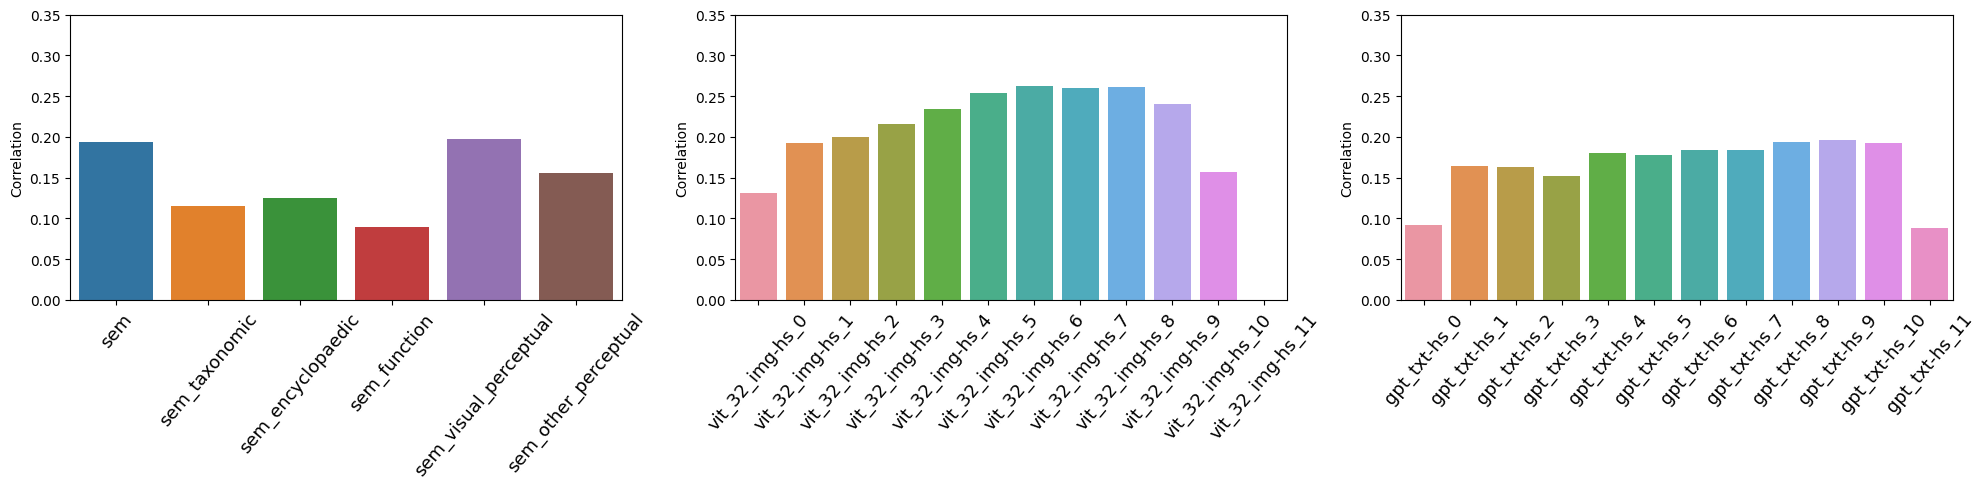

In [61]:
plot_pred_similarity('clip')

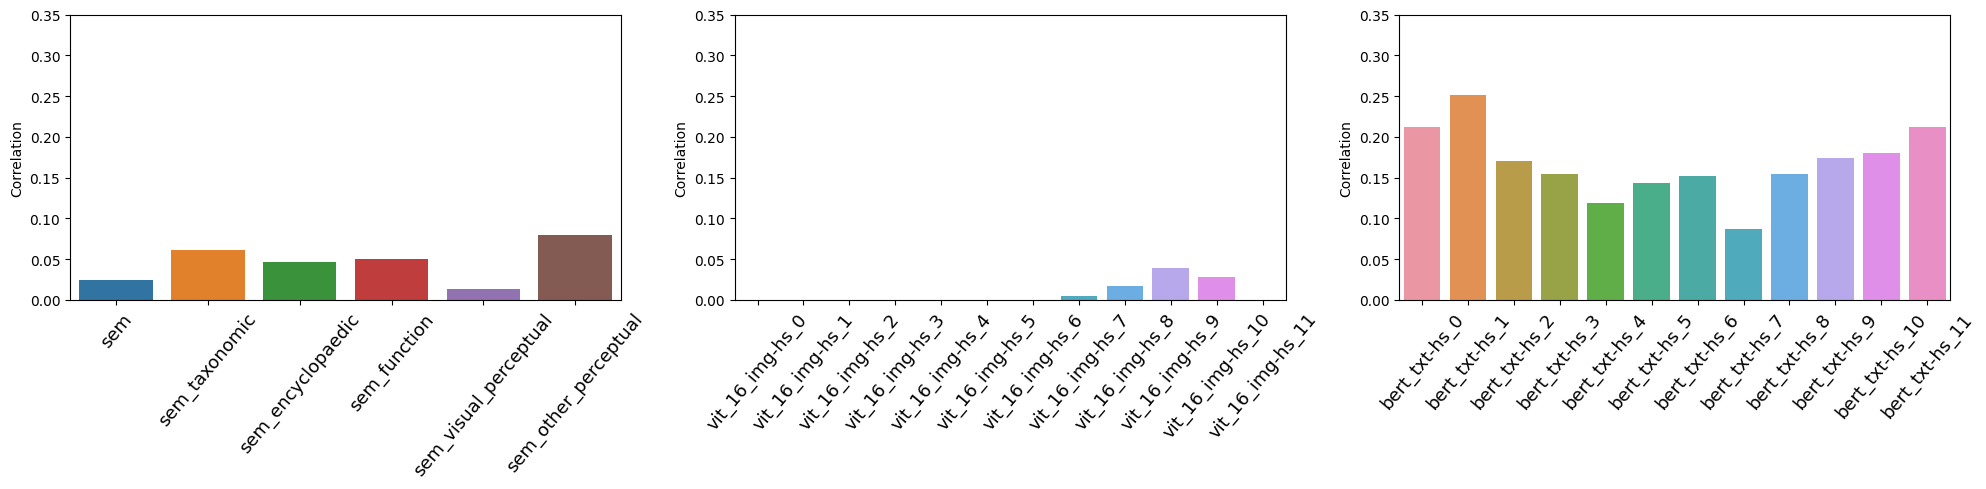

In [62]:
plot_pred_similarity('albef')

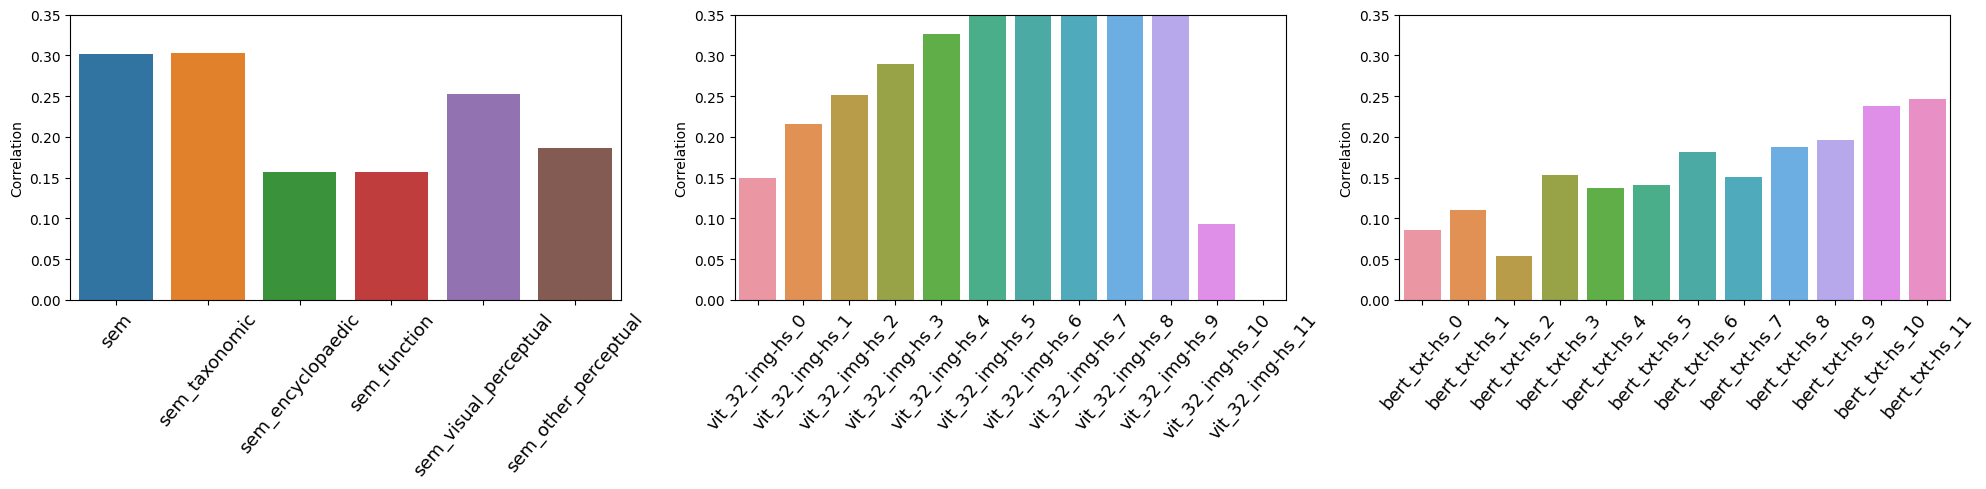

In [63]:
plot_pred_similarity('vilt')

- CLIP more similar to visual perceptual jugments, and more similar to vision model?
- ALBEF assigns more importance to language models?
- ViLT more similar to taxonomic (also to visual perceptual)
    - Highest similarity with networks

__TODO__: Add variance partitioning

: 1) ‘full’ regression,
413 including all three models (DNN Layer 3, DNN Layer 7, behavior), (2-4) ‘combined-predictor’
414 regression, including all pairwise combinations of two models (DNN Layer 3 and behavior, DNN
415 Layer 7 and behavior, DNN Layer 3 and DNN Layer 7), and (5-7) ‘single-predictor regression’
including each model on its own. Subtracting the explained variance (R2 416 ) values of these different
417 regression analyses yields portions of variance that are independently explained by each model,
418 the variance that each model shares with the other two models, and the variance shared by all
419 three

In [65]:
m = 'clip'
c_dist, c_labels = get_concept_match_distance(
    res_path, m, synsets_imgs, center=True, img_to_txt=True, from_preds=True
)

In [66]:
c_dist.shape

(58311,)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

__TODO__: Plot them together

### Compare different streams of same V+L model

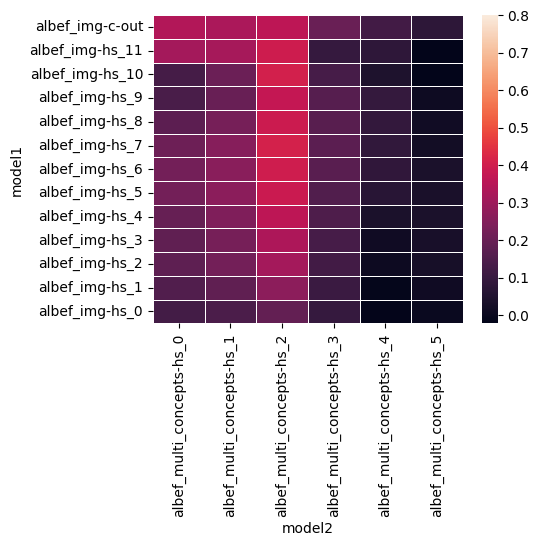

In [66]:
file = rsa_path / 'albef_img_albef_multi.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_multi_concepts-hs_{n}' for n in range(6)]
rows = [f'albef_img-hs_{n}' for n in range(12)] + ['albef_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()
#dist

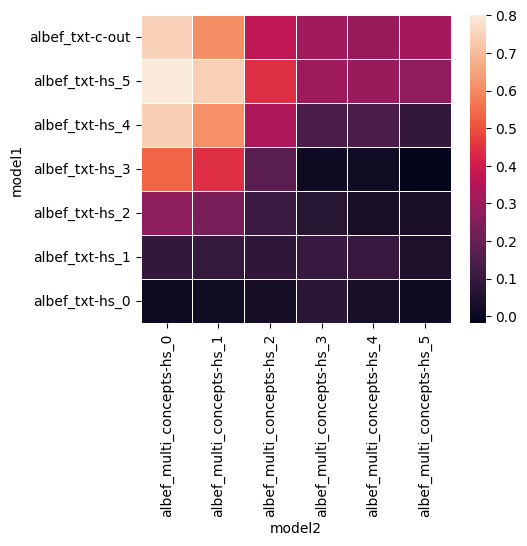

In [67]:
file = rsa_path / 'albef_txt_albef_multi.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_multi_concepts-hs_{n}' for n in range(6)]
rows = [f'albef_txt-hs_{n}' for n in range(6)] + ['albef_txt-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()
#dist

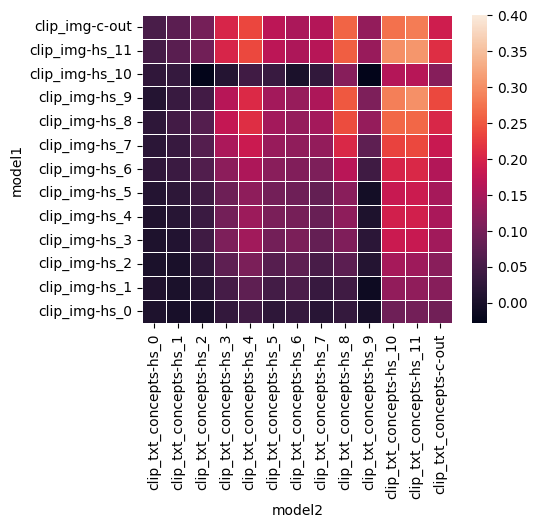

In [68]:
file = rsa_path / 'clip_img_clip_txt.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'clip_txt_concepts-hs_{n}' for n in range(12)] + ['clip_txt_concepts-c-out']
rows = [f'clip_img-hs_{n}' for n in range(12)] + ['clip_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

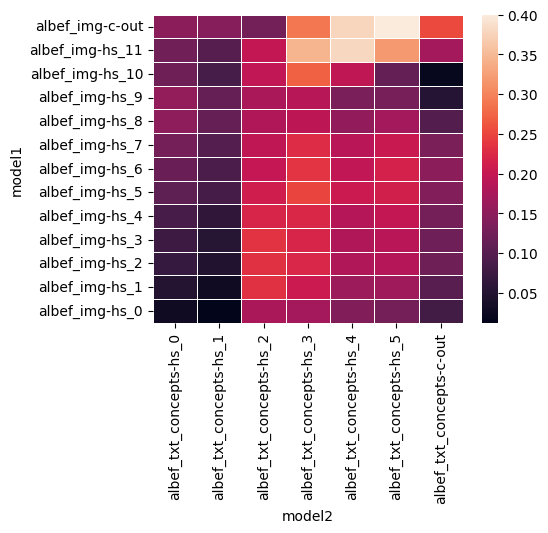

In [69]:
file = rsa_path / 'albef_img_albef_txt.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_txt_concepts-hs_{n}' for n in range(6)] + ['albef_txt_concepts-c-out']
rows = [f'albef_img-hs_{n}' for n in range(12)] + ['albef_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    vmax=.4, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

- ALBEF conserves more textual data towards the final stages of the model
    - Peak in similarity to humans related?

## Can V + L models detect semantic properties of a depicted concept?

### Semantic feature predictions vary across type of features and models

In [36]:
f_match, f_labels = get_match(res_path, m, synsets_imgs, m_type='feature', center=True, avg=False, return_np=False)
f_match.shape

torch.Size([4928, 1863])

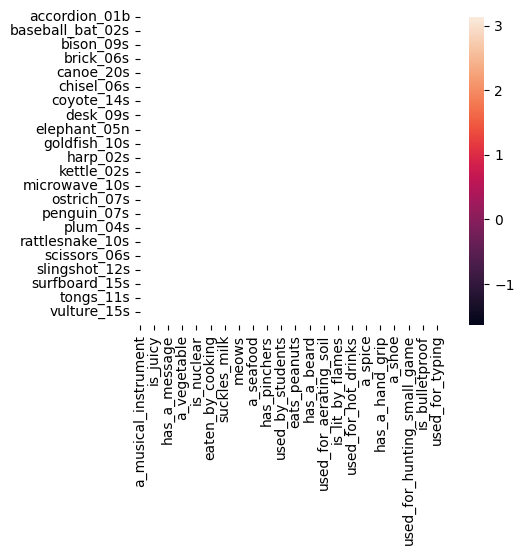

In [57]:
imgs_ids = [v for s in synsets_imgs.values() for v in s]
f_match_test = pd.DataFrame(f_match.detach().numpy(), index=imgs_ids, columns=sem_ft)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    f_match_test, linewidth=.5, 
    #vmax=.6, 
    ax=ax
)
#ax.invert_yaxis()
plt.show()

### Accuracy feature to concept

In [46]:
f_c = fsk_info.loc[fsk_info['features']==sem_ft[0]]['synsets'].unique()
f_c_idx = [synsets.index(c) for c in f_c]
f_c_idx

[0, 12, 14, 71, 82, 118, 130, 147, 151, 152, 168, 215, 316, 326]

In [53]:
fsk_info

,synsets,features,features_type,features_idx
0,accordion-n-01,a_musical_instrument,taxonomic,0
1,accordion-n-01,associated_with_polkas,encyclopaedic,1
2,accordion-n-01,has_buttons,visual_perceptual,2
3,accordion-n-01,has_keys,visual_perceptual,3
4,accordion-n-01,produces_music,other_perceptual,4
...,...,...,...,...
4726,zucchini-n-02,is_long,visual_perceptual,33
4727,zucchini-n-02,is_nutritious,encyclopaedic,86
4728,zucchini-n-02,is_white_inside,visual_perceptual,719
4729,zucchini-n-02,like_a_cucumber,encyclopaedic,1862


In [ ]:
acc = {'top1': [], 'top2': []}
for m in models:
    m_preds = []
    f_match, f_labels = get_match(res_path, m, synsets_imgs, m_type='feature', center=True, avg=False, return_np=False)
    for i, f in enumerate(sem_ft):
        f_c = fsk_info.loc[fsk_info['features']==f]['synsets'].unique()
        f_c_idx = [synsets.index(c) for c in f_c]
        i_pred = f_match[:, i]
        n_s = len(f_info)
        top_k_i = [n_s, (n_s * 2)]
        for s in f_c_idx:
            for t in top_k_i:
                acc.append(f_c_idx in top_indices[:t])
        m_preds.append(val)
    # f_preds[m] = pd.DataFrame(
    #     m_preds, 
    #     columns=['synset', 'image', 'feature', 'feature_type', 'preds', 'top1', 'top2', 'pred_val']
    # )
    # print(m)
    # print(f"Top1 accuracy: {f_preds[m]['top1'].mean()}")
    # print(f"Top2 accuracy: {f_preds[m]['top2'].mean()}")
    # print("\n")

In [ ]:
f_preds = {}
for m in models:
    m_preds = []
    f_match, f_labels = get_match(res_path, m, synsets_imgs, m_type='feature', center=True, avg=False, return_np=False)
    i = 0
    for s, s_imgs in synsets_imgs.items():
        s_info = fsk_info.loc[fsk_info['synsets'] == s]
        n_features = len(s_info)
        top_k_i = [n_features, (n_features * 2)]
        for img in s_imgs:
            i_pred = f_match[i]
            i = i + 1
            top_indices = i_pred.topk(n_features * 2)[1]
            for _, f in s_info.iterrows():
                val = [s, img, f['features'], f['features_type']]
                correct_val = int(f['features_idx'])
                val.append([r_sem_ft_idx[int(i)] for i in top_indices])
                for t in top_k_i:
                    val.append(correct_val in top_indices[:t])
                val.append(i_pred[correct_val].detach().numpy())
                m_preds.append(val)
    f_preds[m] = pd.DataFrame(
        m_preds, 
        columns=['synset', 'image', 'feature', 'feature_type', 'preds', 'top1', 'top2', 'pred_val']
    )
    print(m)
    print(f"Top1 accuracy: {f_preds[m]['top1'].mean()}")
    print(f"Top2 accuracy: {f_preds[m]['top2'].mean()}")
    print("\n")

In [87]:
f_preds = {}
for m in models:
    m_preds = []
    f_match, f_labels = get_match(res_path, m, synsets_imgs, m_type='feature', center=True, avg=False, return_np=False)
    i = 0
    for s, s_imgs in synsets_imgs.items():
        s_info = fsk_info.loc[fsk_info['synsets'] == s]
        n_features = len(s_info)
        top_k_i = [n_features, (n_features * 2)]
        for img in s_imgs:
            i_pred = f_match[i]
            i = i + 1
            top_indices = i_pred.topk(n_features * 2)[1]
            for _, f in s_info.iterrows():
                val = [s, img, f['features'], f['features_type']]
                correct_val = int(f['features_idx'])
                val.append([r_sem_ft_idx[int(i)] for i in top_indices])
                for t in top_k_i:
                    val.append(correct_val in top_indices[:t])
                val.append(i_pred[correct_val].detach().numpy())
                m_preds.append(val)
    f_preds[m] = pd.DataFrame(
        m_preds, 
        columns=['synset', 'image', 'feature', 'feature_type', 'preds', 'top1', 'top2', 'pred_val']
    )
    print(m)
    print(f"Top1 accuracy: {f_preds[m]['top1'].mean()}")
    print(f"Top2 accuracy: {f_preds[m]['top2'].mean()}")
    print("\n")

clip
Top1 accuracy: 0.21128098690364827
Top2 accuracy: 0.29743042563143124


albef
Top1 accuracy: 0.15616230121608982
Top2 accuracy: 0.22645287652011226


vilt
Top1 accuracy: 0.12624239943872778
Top2 accuracy: 0.19282039289055192




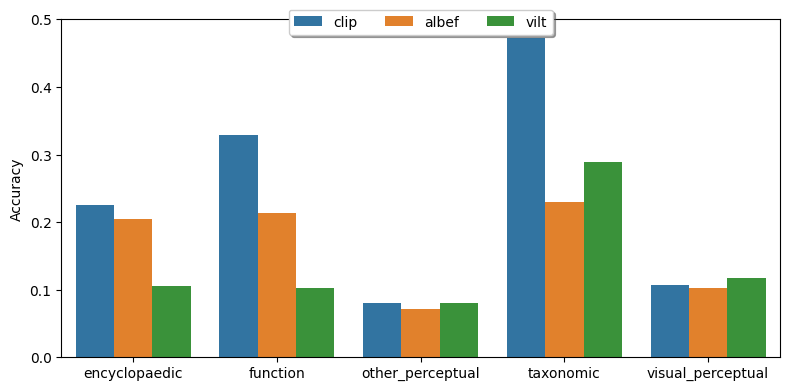

In [95]:
mean_by_f = []
for m in models:
    m_data = f_preds[m].groupby('feature_type').mean().reset_index()
    m_data['model'] = m
    mean_by_f.append(m_data)
mean_by_f = pd.concat(mean_by_f)
mean_by_f = mean_by_f.drop('top2', axis=1)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(
    x='feature_type', y='top1', hue='model', 
    data=mean_by_f, hue_order=['clip', 'albef', 'vilt']
)
ax.set(ylim=(0, 0.5))
ax.set(xlabel=None, ylabel='Accuracy')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

Why visual perceptual is low if specially for CLIP if their judgements are related to them? Maybe they learn the invariances but do not learn to match them?

- __To-DO__: Add statistical tests

### Semantic distances are represented across the layers of the network

- Show plots of semantic information
- With variance partitioning

## Are concept and semantic-feature predictions related?

In [150]:
kld_stats = {}
for m in models:
    kld = pd.read_csv(res_path / 'kld' / f'{m}_entropy_concept_feature.csv', index_col=0)
    kld_m = []
    for s in synsets:
        s_vals = []
        s_info = kld.loc[kld['synset']==s]
        s_ft = get_fsk_features(project_path / 'dataset', synsets=[s])
        s_true_info = s_info.loc[s_info['feature'].isin(s_ft)]
        s_vals.append(s_true_info.mean().values[0])
        s_vals.append(s_info.loc[~s_info['feature'].isin(s_ft)].mean().values[0])
        # append synset entropy and random
        for ftype in feature_types:
            if ftype == None:
                continue
            else:
                s_vals.append(
                    s_true_info.loc[s_true_info['feature']
                    .isin([f for f in s_true_info['feature'] if sem_ft_type[f]==ftype])]
                    .mean().values[0]
                )
        kld_m.append(s_vals)
    kld_stats[m] = pd.DataFrame(
        kld_m, index=synsets, 
        columns=[
            'sem_related', 'unrelated', 'taxonomic', 'encyclopaedic', 
            'function', 'visual_perceptual','other_perceptual'
        ]
    )

In [152]:
kld_stats['clip'].mean()

sem_related          0.056117
unrelated            0.073481
taxonomic            0.043225
encyclopaedic        0.057716
function             0.057818
visual_perceptual    0.057586
other_perceptual     0.053932
dtype: float64

In [155]:
kld_stats['albef'].mean()

sem_related          0.347735
unrelated            0.373597
taxonomic            0.358339
encyclopaedic        0.287019
function             0.391941
visual_perceptual    0.352672
other_perceptual     0.305745
dtype: float64

In [154]:
kld_stats['vilt'].mean()

sem_related          0.678089
unrelated            1.046453
taxonomic            0.517836
encyclopaedic        0.777118
function             0.692322
visual_perceptual    0.670344
other_perceptual     0.731149
dtype: float64

clip
Ttest_relResult(statistic=-40.9216641133697, pvalue=1.2869257371134239e-133)


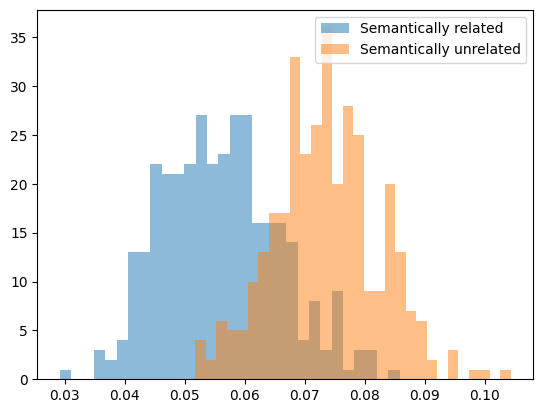

albef
Ttest_relResult(statistic=-8.2048258956969, pvalue=4.782360714207164e-15)


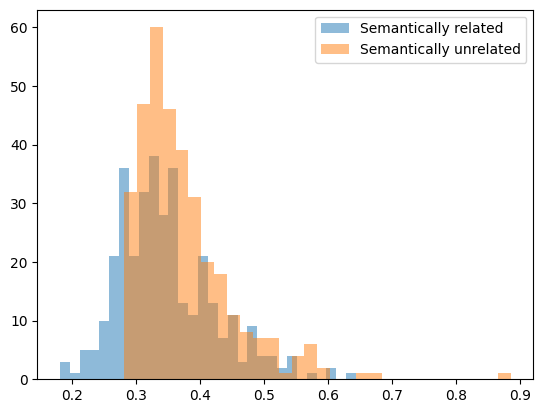

vilt
Ttest_relResult(statistic=-33.94506886604158, pvalue=2.1642696382977274e-111)


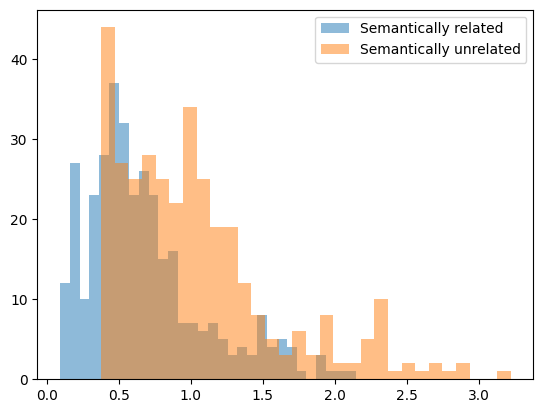

In [165]:
for m in models:
    print(m)
    sem_related_kld = kld_stats[m]['sem_related']
    sem_unrelated_kld = kld_stats[m]['unrelated']
    print(ttest_rel(sem_related_kld, sem_unrelated_kld))
    
    bins=30
    plt.hist(sem_related_kld, alpha=0.5, bins=bins, label='Semantically related')
    plt.hist(sem_unrelated_kld, alpha=0.5, bins=bins, label='Semantically unrelated')
    plt.legend(loc='upper right')
    plt.show()

In [235]:
clip_kld = (
    pd.read_csv(res_path / 'kld' / f'clip_entropy_concept_feature.csv', index_col=0)
    .set_index(['synset', 'feature'])
)
clip_kld.xs('accordion-n-01', level=0).sort_values(by='entropy')[:10]

,entropy
feature,
a_piano,0.036324
produces_different_sounds,0.043719
produces_bass_notes,0.043792
associated_with_polkas,0.044760
like_a_guitar,0.045907
acoustic,0.046253
produces_sound,0.046343
is_hollow,0.047936
a_chair,0.048167


In [234]:
vilt_kld = (
    pd.read_csv(res_path / 'kld' / f'vilt_entropy_concept_feature.csv', index_col=0)
    .set_index(['synset', 'feature'])
)
vilt_kld.xs('accordion-n-01', level=0).sort_values(by='entropy')[:10]

,entropy
feature,
a_musical_instrument,0.329469
an_instrument,0.337160
like_a_guitar,0.355184
used_in_marching_bands,0.382715
used_by_musicians,0.391527
associated_with_saddles,0.395229
a_music,0.398175
has_guns,0.448229
has_a_belt,0.462621


In [239]:
albef_kld = (
    pd.read_csv(res_path / 'kld' / f'albef_entropy_concept_feature.csv', index_col=0)
    .set_index(['synset', 'feature'])
)
albef_kld.xs('alligator-n-02', level=0).sort_values(by='entropy')[:10]

,entropy
feature,
dump,0.123137
floats,0.133186
flies,0.134167
fires,0.140956
clucks,0.141963
requires_captains,0.141988
grand,0.142273
produces_beats,0.143196
leaks,0.143255


In [175]:
synsets[:10]

['accordion-n-01',
 'airplane-n-01',
 'alligator-n-02',
 'ambulance-n-01',
 'anchor-n-01',
 'ant-n-01',
 'apple-n-01',
 'apron-n-01',
 'armor-n-01',
 'ashtray-n-01']

In [178]:
vilt_kld.xs('airplane-n-01', level=0).sort_values(by='entropy')[:20]

,entropy
feature,
an_airplane,0.067608
launched_from_airplanes,0.341740
dropped_from_airplanes,0.530081
used_for_sailing,0.672080
has_propellers,0.747725
has_sails,0.769661
used_for_racing,0.771577
used_by_sailors,0.782988
has_an_engine,0.791842


In [180]:
clip_kld = (
    pd.read_csv(res_path / 'kld' / 'clip_entropy_concept_feature.csv', index_col=0)
    .set_index(['synset', 'feature'])
)
clip_kld.xs('ambulance-n-01', level=0).sort_values(by='entropy')[:20]

,entropy
feature,
a_van,0.028483
a_toy,0.033702
a_vehicle,0.033872
a_car,0.035432
used_for_rescuing,0.037001
used_for_shopping,0.037669
used_for_advertising,0.037995
a_truck,0.038143
has_a_flat_head_(slot),0.038420


- Problems with KL divergence?

## How are the invariances used to predict concepts relate to the invariances used to predict features?

- RSA imilarity between distances based on concepts and those based on features

- distances in concepts are more similar early in the network that distances in features? depends on the type of features?

- Correlate distances of feature predictions and concept predictions from distances in own's networks kayers

In [225]:
from fsk.it_match.load import get_concept_match_distance

m = 'clip'
c_dist, c_labels = get_concept_match_distance(res_path, m, synsets_imgs)

In [227]:
c_dist.shape

(58311,)

In [22]:
corr_info = []
for m_info in multi_models_info:
    m = m_info['dnn']
    c_dist, c_labels = get_concept_match_distance(res_path, m, synsets_imgs, img_to_txt=False)
    for stream in m_info['stream']:
        if stream == 'img':
            st = stream
        else:
            st = f'{stream}_concepts'
        for l in layers[f'{m}_{stream}']:
            l_f = rsa_path / 'distances' / f'{m}_{st}_{l}.pkl'
            with open(l_f, 'rb') as f:
                l_dist, l_labels = pickle.load(f)
            corr_coef, p_val = spearmanr(-c_dist, l_dist, nan_policy='omit')
            corr_info.append([m, st, l, corr_coef, np.round(p_val, 4)])
corr_info = pd.DataFrame(corr_info, columns=['model', 'stream', 'layer', 'corr', 'pval'])

In [23]:
corr_info.loc[(corr_info['model']=='clip')]

,model,stream,layer,corr,pval
0,clip,img,hs_0,0.119188,0.0
1,clip,img,hs_1,0.167742,0.0
2,clip,img,hs_2,0.188272,0.0
3,clip,img,hs_3,0.211275,0.0
4,clip,img,hs_4,0.220955,0.0
5,clip,img,hs_5,0.212731,0.0
6,clip,img,hs_6,0.239011,0.0
7,clip,img,hs_7,0.257261,0.0
8,clip,img,hs_8,0.285347,0.0
9,clip,img,hs_9,0.321141,0.0


In [24]:
corr_info.loc[(corr_info['model']=='albef')]

,model,stream,layer,corr,pval
26,albef,img,hs_0,-0.012331,0.0029
27,albef,img,hs_1,-0.015465,0.0002
28,albef,img,hs_2,-0.002881,0.4867
29,albef,img,hs_3,-0.000710,0.8639
30,albef,img,hs_4,-0.000709,0.8641
31,albef,img,hs_5,0.000267,0.9485
32,albef,img,hs_6,0.002174,0.5997
33,albef,img,hs_7,0.024819,0.0000
34,albef,img,hs_8,0.045209,0.0000
35,albef,img,hs_9,0.068237,0.0000


In [25]:
corr_info.loc[(corr_info['model']=='vilt')]

,model,stream,layer,corr,pval
52,vilt,multi_concepts,hs_0,0.119322,0.0
53,vilt,multi_concepts,hs_1,0.422512,0.0
54,vilt,multi_concepts,hs_2,0.469662,0.0
55,vilt,multi_concepts,hs_3,0.503251,0.0
56,vilt,multi_concepts,hs_4,0.494326,0.0
57,vilt,multi_concepts,hs_5,0.501905,0.0
58,vilt,multi_concepts,hs_6,0.505589,0.0
59,vilt,multi_concepts,hs_7,0.515612,0.0
60,vilt,multi_concepts,hs_8,0.492016,0.0
61,vilt,multi_concepts,hs_9,0.490385,0.0


In [27]:
def plot_clip_corr():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    for stream, ax in zip(['img', 'txt_concepts'], axes.flat):
        i_plot = corr_info.loc[
            (corr_info['model']=='clip')
            & (corr_info['stream'] == stream)
        ]
        sns.barplot(
            x='layer', y='corr', data=i_plot, ax=ax
        )
        ax.set(ylim=(0, 0.4))
        ax.set(xlabel=stream, ylabel='RSA')
        # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
        #           ncol=6, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

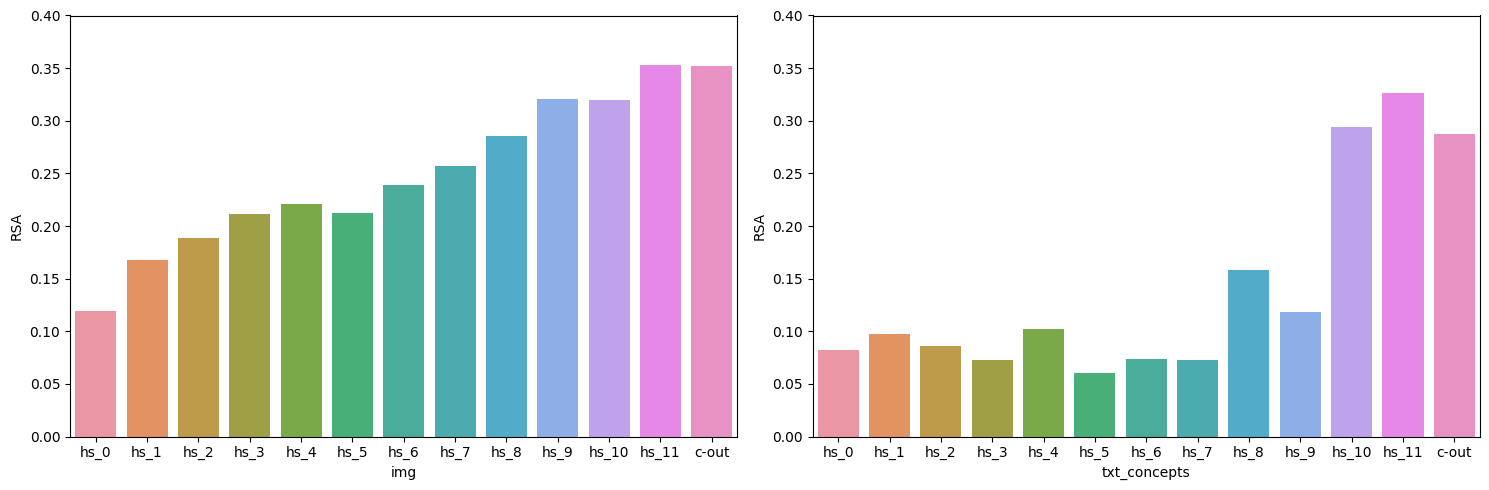

In [28]:
plot_clip_corr()

In [31]:
def plot_albef_corr():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    for stream, ax in zip(['img', 'txt_concepts', 'multi_concepts'], axes.flat):
        i_plot = corr_info.loc[
            (corr_info['model']=='albef')
            & (corr_info['stream'] == stream)
        ]
        sns.barplot(
            x='layer', y='corr', data=i_plot, ax=ax
        )
        ax.set(ylim=(0, 0.1))
        ax.set(xlabel=stream, ylabel='RSA')
        # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
        #           ncol=6, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

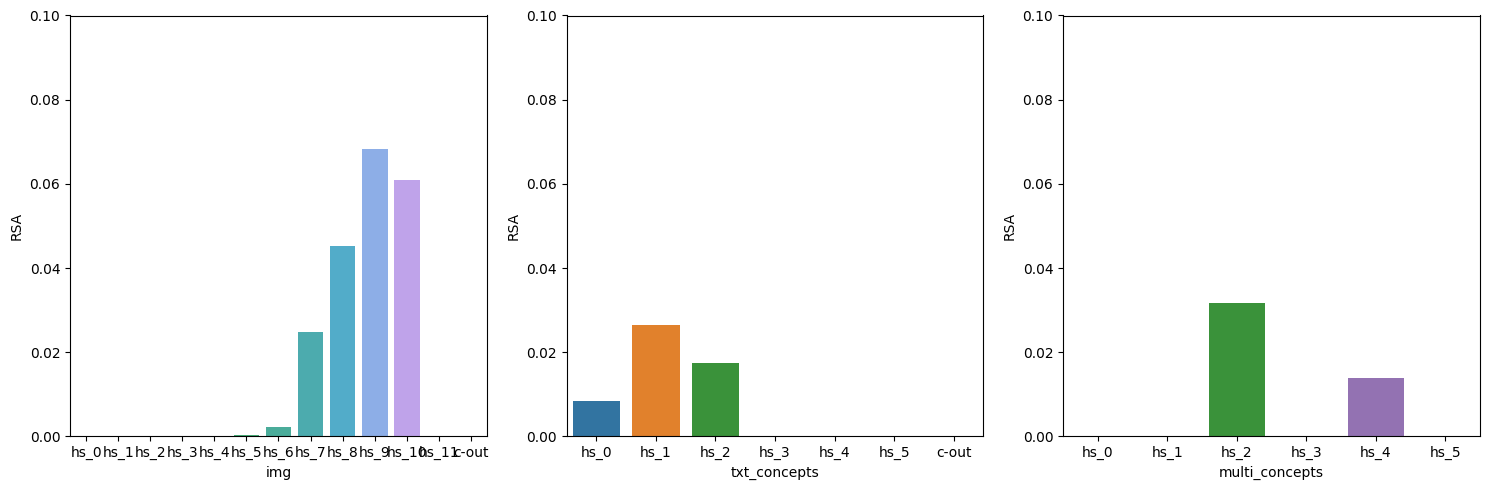

In [32]:
plot_albef_corr()

In [33]:
def plot_vilt_corr():
    fig, ax = plt.subplots(figsize=(15,5))
    i_plot = corr_info.loc[
        (corr_info['model']=='vilt')
    ]
    sns.barplot(
        x='layer', y='corr', data=i_plot, ax=ax
    )
    ax.set(ylim=(0, 0.7))
    ax.set(xlabel='multi', ylabel='RSA')
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
    #           ncol=6, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

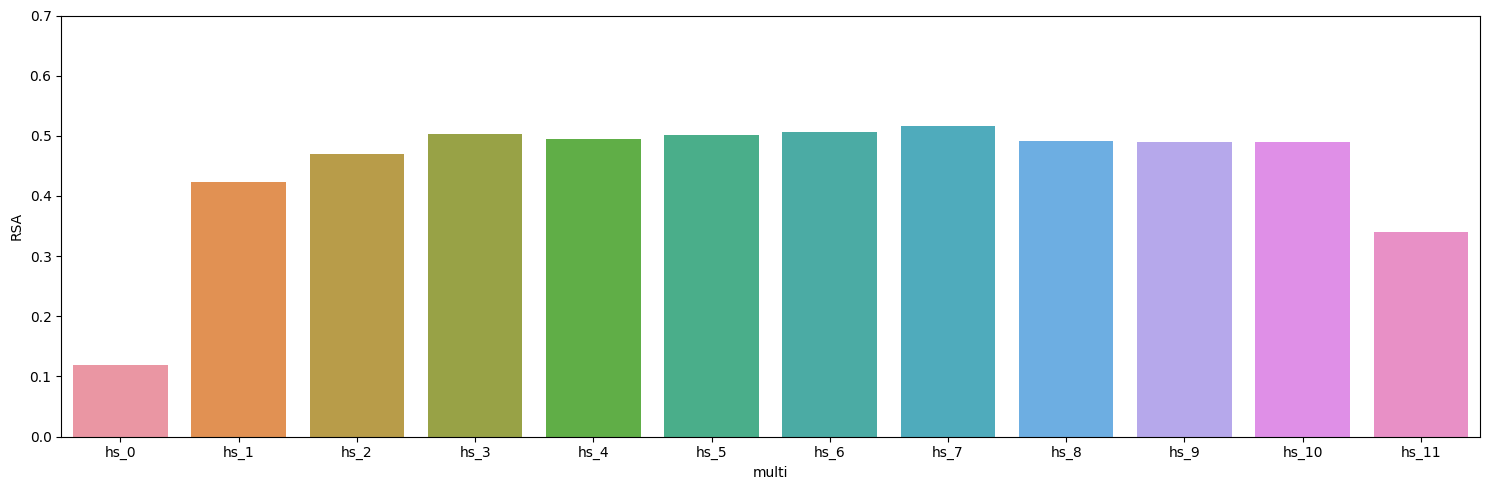

In [34]:
plot_vilt_corr()